In [ ]:
!pip install mdct

  Created wheel for mdct: filename=mdct-0.4-py2.py3-none-any.whl size=6387 sha256=2d6bef536be4e385ee162c50f11ede65a265bea1a81fb2f57d0568ddf2b8c66a
  Stored in directory: /root/.cache/pip/wheels/43/67/48/b296037a3f906072330d2a03dc19bd62f73098d9e4a4d349c3
Successfully built mdct


In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.signal import hamming
from scipy.spatial.distance import cdist

import IPython.display as ipd
from mdct.fast import mdct, imdct

plt.rcParams['figure.figsize'] = (12,8)

In [ ]:
# useful functions

def plot_sound(data, rate, title=None):
    if data.ndim == 1:
        data = data[:,np.newaxis]
    times = np.arange(data.shape[0])/rate
    plt.figure(figsize=(30,6))
    for channel in data.T:
        plt.fill_between(times, channel)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xlim(times[0], times[-1])
    if title:
        plt.title(title)
    plt.show()
    
def play_sound(data, rate):
    return ipd.Audio(data.T, rate=rate)

Part 1

Three instruments, bass(left), guitar(right) and piano (both)

T = 220501, M = 2


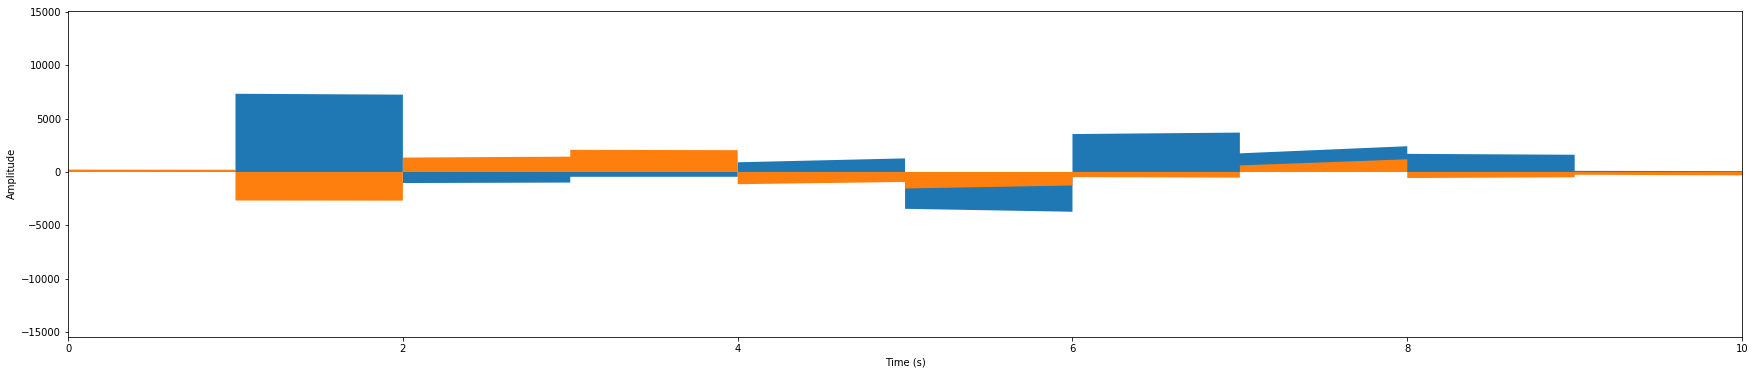

In [ ]:
fname = 'mix.wav'
rate, x = wavfile.read(fname)
print('T = {:d}, M = {:d}'.format(*x.shape))
plot_sound(x, rate)
play_sound(x, rate)

Part 2

We can not identify the directions of the sources.

(-11025.0, 231525.0, -15453.0, 15127.0)

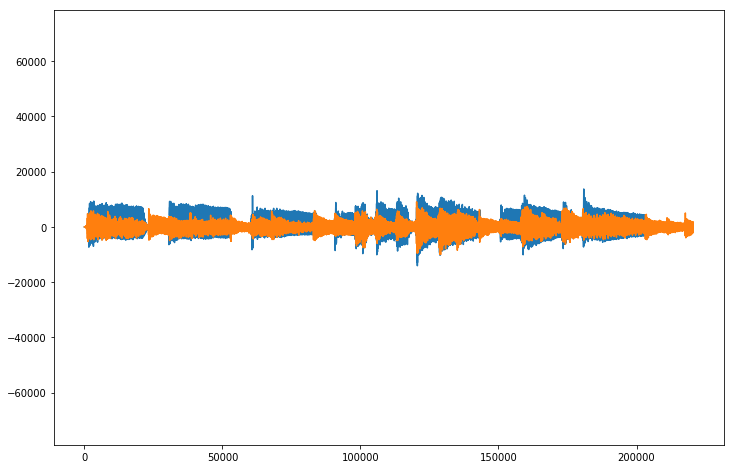

In [ ]:
plt.plot(x)
plt.axis('equal')

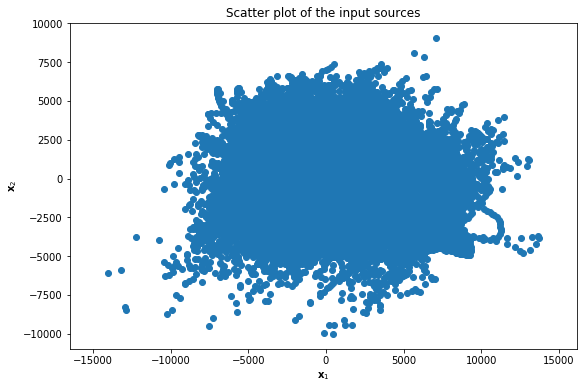

In [ ]:
fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.title('Scatter plot of the input sources')
plt.plot(x[:,0], x[:,1], 'C0o')
plt.xlabel("$\mathbf{x}_1$")
plt.ylabel("$\mathbf{x}_2$")
plt.axis('equal');

Part 3

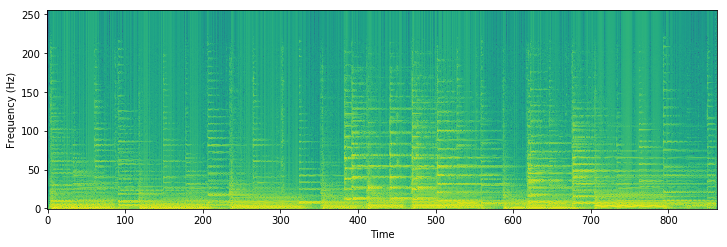

In [ ]:
X = mdct(x, window=hamming, framelength=512)
Z = X.view(dtype=np.complex128)[...,0]

X_norm = np.abs(Z)**2

plt.imshow(np.log(X_norm+1e-10), origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()

Part 4

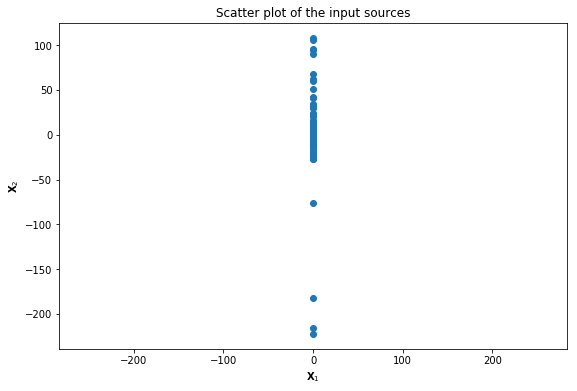

In [ ]:
fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.title('Scatter plot of the input sources')
plt.plot(X[:,0], X[:,1], 'C0o')
plt.xlabel("$\mathbf{X}_1$")
plt.ylabel("$\mathbf{X}_2$")
plt.axis('equal');

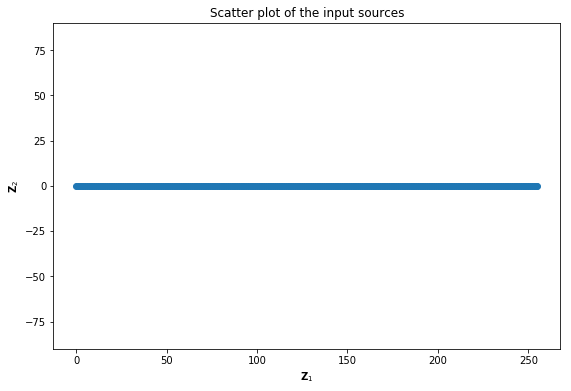

In [ ]:
fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.title('Scatter plot of the input sources')
plt.plot(Z[:,0], Z[:,1], 'C0o')
plt.xlabel("$\mathbf{Z}_1$")
plt.ylabel("$\mathbf{Z}_2$")
plt.axis('equal');

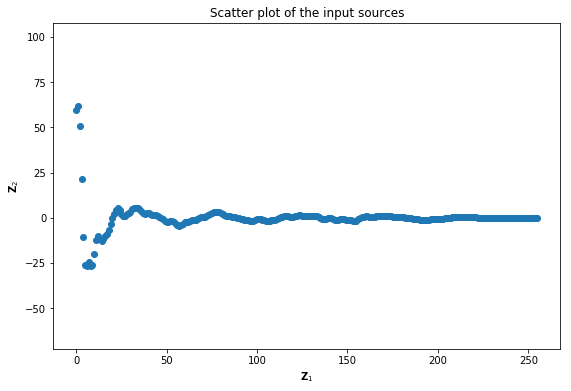

In [ ]:
fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.title('Scatter plot of the input sources')
plt.plot(Z[:,1], 'C0o')
plt.xlabel("$\mathbf{Z}_1$")
plt.ylabel("$\mathbf{Z}_2$")
plt.axis('equal');

Part 5

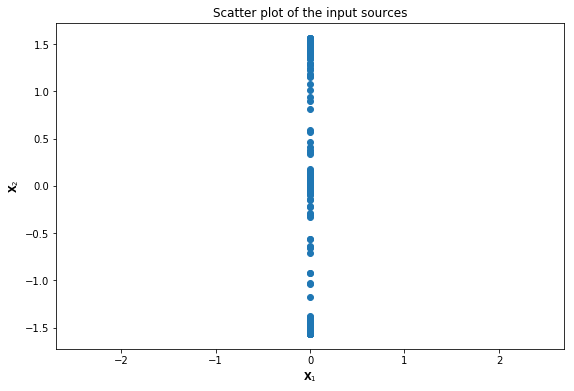

In [ ]:
fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.title('Scatter plot of the input sources')
plt.plot(Z_arctan[:,0], Z_arctan[:,1], 'C0o')
plt.xlabel("$\mathbf{X}_1$")
plt.ylabel("$\mathbf{X}_2$")
plt.axis('equal');

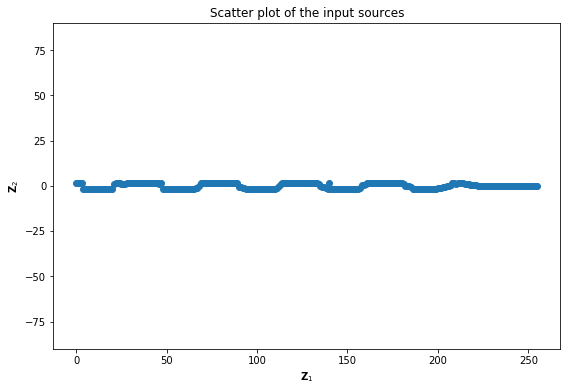

In [ ]:
Z_arctan= np.arctan(Z)
fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.title('Scatter plot of the input sources')
plt.plot(Z_arctan[:,1], 'C0o')
plt.xlabel("$\mathbf{Z}_1$")
plt.ylabel("$\mathbf{Z}_2$")
plt.axis('equal');